# This project is the final portfolio project provided by Codecademy's Deep Learning with Tensorflow skill path. It aims at analyzing catographic features in order to classify the most commen forest cover type.

### The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. The covertypes are the following:

> 1- Spruce/Fir

> 2- Lodgepole Pine

> 3- Ponderosa Pine

> 4- Cottonwood/Willow

> 5- Aspen

> 6- Douglas-fi

> 7- Krummholz

### Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data also contains binary columns for qualitative independent variables like wilderness areas and soil type. 

### This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. They represent forests with minimal human-caused disturbances, so existing forest cover types are mainly a result of ecological processes rather than forest management practices.

-----------------------------------------
### Needless to say that deep learning excels at caputring complex data, and/or large datasets with many interactions between features. As there many areas with many soil types to inspect this looks like a good use case to highlight how great deep learning, specifically speaking, neural networks are great at handling and understanding the patterns hidden within. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("cover_data.csv")

## Getting a look and understadning our data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

> #### 581011 obersvations in the dataset

In [5]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


> ### 1- All features are represented by numbers, making them numerical. Machine learning models prefer numerical inputs for their computations.

> ### 2- While many features contain numbers that represent quantitative values, others, such as wilderness area and all soil types, represent qualitative attributes designed to distinguish between different areas and soil types.

### Looking at the features themselves
    
`Elevation` / quantitative /meters / Elevation in meters

`Aspect` / quantitative / azimuth / Aspect in degrees azimuth

`Slope` / quantitative / degrees / Slope in degrees

`Horizontal_Distance_To_Hydrology` / quantitative / meters / Horz Dist to nearest surface water features

`Vertical_Distance_To_Hydrology` / quantitative / meters / Vert Dist to nearest surface water features

`Horizontal_Distance_To_Roadways` / quantitative / meters / Horz Dist to nearest roadway

`Hillshade_9am` / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice

`Hillshade_Noon` / quantitative / 0 to 255 index / Hillshade index at noon, summer solstice

`Hillshade_3pm` / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice

`Horizontal_Distance_To_Fire_Points` / quantitative / meters / Horz Dist to nearest wildfire ignition points

`Wilderness_Area` (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation

`Soil_Type` (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation

`Cover_Type` (7 types) / integer / 1 to 7 / Forest Cover Type designation 

In [6]:
# Should only 0 and 1 as it is a binary column as mentioned
df.Soil_Type1.unique()

array([0, 1], dtype=int64)

In [7]:
# Should include 7 classes to classify
df["class"].unique() # Note that class is a keyword in Python using "df.class" will return an error

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

In [8]:
# I will make the class target feature start from 0 (1 --> 0 : Spruce/Fir) 
df["class"] = df["class"] - 1

In [9]:
df["class"].value_counts(normalize = True)

class
1    0.487599
0    0.364605
2    0.061537
6    0.035300
5    0.029891
4    0.016339
3    0.004728
Name: proportion, dtype: float64

> #### A huge sign of class imbalance is present. It will better to stratify the labels in order to preserve proportions.

In [10]:
#  ensures that the class distribution in the training and testing sets matches the original dataset, preventing bias in imbalanced classes.
train_set,test_set = train_test_split(df,test_size=0.10,random_state = 42,stratify = df["class"])

## Data Pre-processing 

    Checking aspects like the amount of missing data, duplicates, distriubtions for skewness, and box plots to understand if outliers are present.  

In [11]:
train_set.isna().any()

Elevation                             False
Aspect                                False
Slope                                 False
Horizontal_Distance_To_Hydrology      False
Vertical_Distance_To_Hydrology        False
Horizontal_Distance_To_Roadways       False
Hillshade_9am                         False
Hillshade_Noon                        False
Hillshade_3pm                         False
Horizontal_Distance_To_Fire_Points    False
Wilderness_Area1                      False
Wilderness_Area2                      False
Wilderness_Area3                      False
Wilderness_Area4                      False
Soil_Type1                            False
Soil_Type2                            False
Soil_Type3                            False
Soil_Type4                            False
Soil_Type5                            False
Soil_Type6                            False
Soil_Type7                            False
Soil_Type8                            False
Soil_Type9                      

In [12]:
train_set.duplicated().any()

False

> #### No Nulls nor duplicates

In [13]:
# Describes some summary statistics, like mean, standard deviation, min, max, 
# and precentiles to get a general sense of the features
num_cols = train_set.drop(train_set.filter(regex="Soil_Type|Wilderness_Area|class").columns, axis=1).columns
num_df = train_set[num_cols]
num_df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,522910.000000,522910.000000,522910.000000,522910.000000,522910.000000,522910.000000,522910.000000,522910.000000,522910.000000,522910.000000
mean,2959.524247,155.771791,14.105194,269.367077,46.408988,2351.086539,212.136970,223.321168,142.540242,1980.907389
std,279.988868,111.941404,7.488425,212.525077,58.287561,1559.573045,26.774462,19.764520,38.279075,1323.813158
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1998.000000,218.000000,226.000000,143.000000,1711.000000
75%,3164.000000,261.000000,18.000000,384.000000,69.000000,3330.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7172.000000


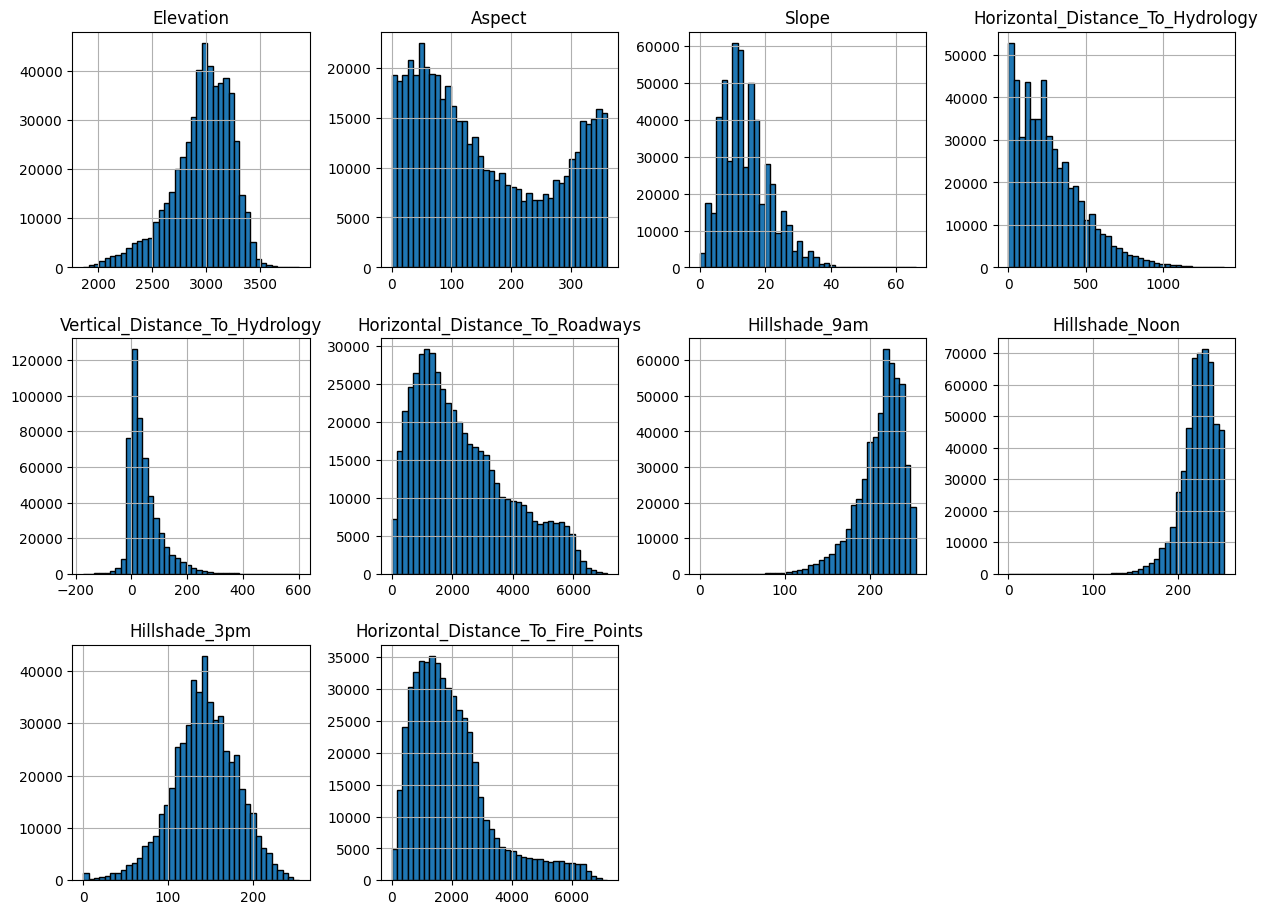

<Figure size 640x480 with 0 Axes>

In [14]:
# Checking distributions
num_df.hist(bins=40,figsize=(15, 15),layout=(4, 4),edgecolor='black')
plt.title("Distibutions")
plt.show()
plt.clf()


> #### `Hillshade_3pm` exhibits a normally distributed plot with some skewness to the left, while `Aspect` looks to bi-modal with two peaks. All other features are skewed and could be delt with by clipping them to a specified range (using a formual using Q1(25th percentile), Q3(75th percentile), and the InterQuantileRange (Q3-Q1) "Q1 - (number) * IQR","Q3 + (number) * IQR") to help reduce skewness and any potential outliers.

> #### Another method is utilizing the log transformation for right skewed features. However, we lose the aspect of interpretability by altering the scale of the data.

> #### I will inspect outliers and then cap the features needed. As for the skewed features I will retain from doing anything until model preformance is in check. 

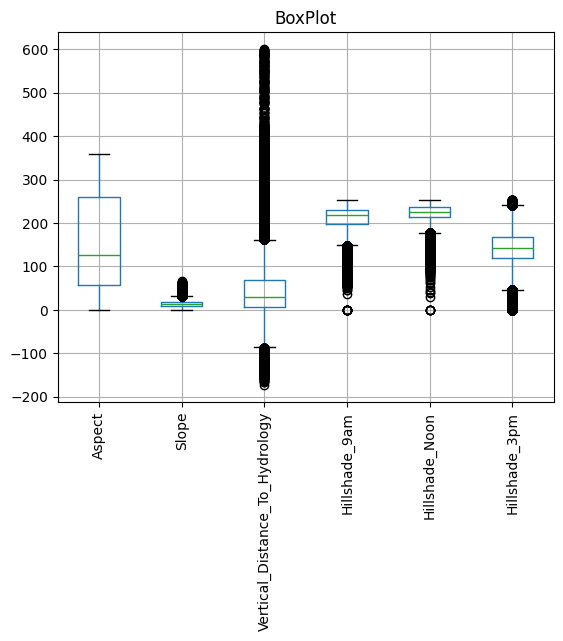

<Figure size 640x480 with 0 Axes>

In [15]:
# Checking for outliers
num_df.drop(["Elevation","Horizontal_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points"],axis=1).boxplot()
plt.title("BoxPlot")
plt.xticks(rotation = 90)
plt.show()
plt.clf()

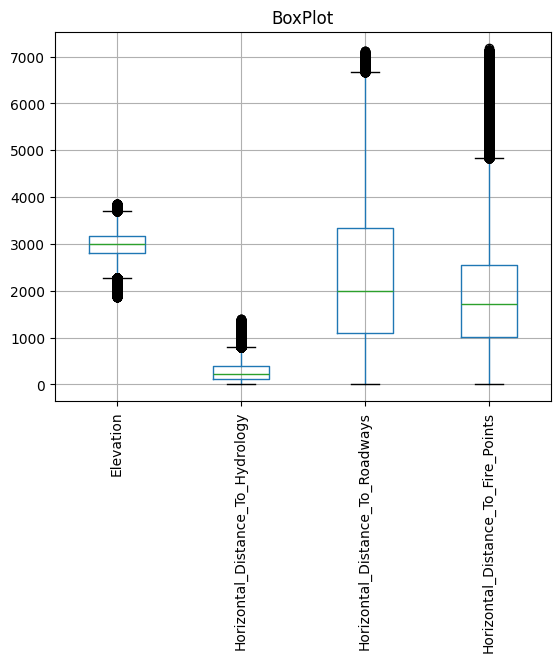

<Figure size 640x480 with 0 Axes>

In [16]:
num_df[["Elevation","Horizontal_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points"]].boxplot()
plt.title("BoxPlot")
plt.xticks(rotation = 90)
plt.show()
plt.clf()

> #### According to the plots some fetures have some outliers. I will cap `Vertical_Distance_To_Hydrology` and `Horizontal_Distance_To_Fire_Points`and retain the bounds to apply them on the test set. This way we avoid learning anything about the test set, preventing data leakage (leaking data from the test that should not have been looked into). 

In [17]:
def cap_outliers(df:pd.DataFrame,features:list) -> dict:
    bounds = {}
    for f in features:
        Q1 = np.percentile(df[f],0.25)
        Q3 = np.percentile(df[f],0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        bounds[f] = (lower_bound,upper_bound)
        df[f] = np.clip(df[f], lower_bound, upper_bound)

    return bounds

In [18]:
bounds = cap_outliers(train_set,["Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Fire_Points"])

In [19]:
print(bounds)

{'Vertical_Distance_To_Hydrology': (-120.0, -8.0), 'Horizontal_Distance_To_Fire_Points': (-4.5, 247.5)}


In [20]:
def clip_test(df:pd.DataFrame,bounds:dict) -> pd.DataFrame:
    for feature, bounds_tuple in bounds.items():
        df[feature] = np.clip(df[feature],bounds_tuple[0],bounds_tuple[1])
    return df

In [21]:
test_set = clip_test(test_set,bounds)

## Exploratory Data Analysis

    We will look at basic concepts that will help before feeding the model:
        1- Variance Threshold
        2- Correlations between numerical features
        3- Mutual Information

    Note that all categorical features are represented in numbers so no categorical encoding is needed, and the label (class) is also represented in numbers so Label Encoding is not needed.

    .... later expandings could include:
        - Testing for Hypothesis on a uni-variate level
        - Testing for associations between features to prove significance

#### Variance threshold is used to remove any features that have little to no variation in their values. This is because features with low variance do not contribute much information to a model.

In [22]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0)  # 0 is default

print(selector.fit_transform(num_df))

num_cols = list(num_df.columns[selector.get_support(indices=True)])

print(num_cols)

[[3069  332    5 ...  234  163 2557]
 [2916  117    7 ...  234  135 3228]
 [2921   58   15 ...  208  108 1693]
 ...
 [3142   78    7 ...  228  132 3467]
 [3212  304    9 ...  236  179  420]
 [3228   54    6 ...  226  137 3050]]
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


In [23]:
num_df.columns 

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')

> #### All numerical features are to be included

In [24]:
# Looking at the correlations between features (using num_df)
corr_matrix = num_df.corr()
corr_matrix

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,0.016139,-0.242546,0.306213,0.093340,0.365424,0.112108,0.205306,0.058857,0.147901
Aspect,0.016139,1.000000,0.078073,0.017154,0.069824,0.025056,-0.579057,0.336064,0.646884,-0.108971
Slope,-0.242546,0.078073,1.000000,-0.010858,0.274173,-0.216421,-0.326833,-0.526929,-0.176015,-0.185841
Horizontal_Distance_To_Hydrology,0.306213,0.017154,-0.010858,1.000000,0.606493,0.072081,-0.026641,0.046842,0.052018,0.052045
Vertical_Distance_To_Hydrology,0.093340,0.069824,0.274173,0.606493,1.000000,-0.046583,-0.165706,-0.110368,0.034894,-0.070005
Horizontal_Distance_To_Roadways,0.365424,0.025056,-0.216421,0.072081,-0.046583,1.000000,0.034684,0.189364,0.105851,0.332017
Hillshade_9am,0.112108,-0.579057,-0.326833,-0.026641,-0.165706,0.034684,1.000000,0.010074,-0.780466,0.132797
Hillshade_Noon,0.205306,0.336064,-0.526929,0.046842,-0.110368,0.189364,0.010074,1.000000,0.594004,0.057870
Hillshade_3pm,0.058857,0.646884,-0.176015,0.052018,0.034894,0.105851,-0.780466,0.594004,1.000000,-0.047801
Horizontal_Distance_To_Fire_Points,0.147901,-0.108971,-0.185841,0.052045,-0.070005,0.332017,0.132797,0.057870,-0.047801,1.000000


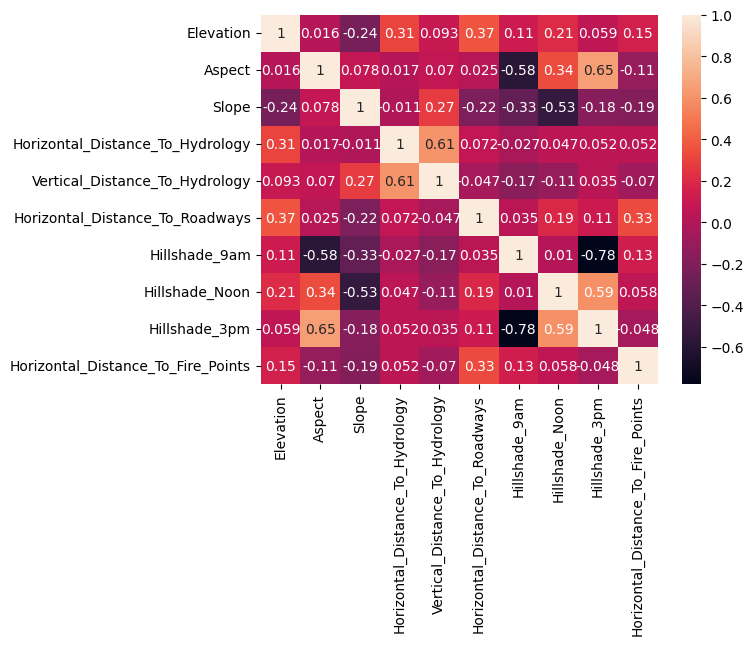

<Figure size 640x480 with 0 Axes>

In [25]:
sns.heatmap(corr_matrix,annot=True)
plt.show()
plt.clf()

> #### What we're looking at is how correlated are these features, essentially asking: "how does a feature change when the other changes?". Features with high correlation (assume >= 0.7) introduce multicolinearity, where they could provide redundant data to the model. Both (`Hillshade_9am` and `Hillshade_3pm`) and (`Vertical_Distance_To_Hydrology` and `Vertical_Distance_To_Roadways`) are features that could indicate multicolinearity, but they will be kept as is to check the model preformance.

#### Mutual information is a measure of dependence between two variables and can be used to gauge how much a feature contributes to the prediction of the target variable.

> #### The estimated mutual information between each feature and the target is returned in a numpy array, where each value is a non-negative number — the higher the value, the more predictive power is assumed.

In [26]:
from sklearn.feature_selection import mutual_info_classif # Used is it a classification task

discrete_features = [col not in num_df.columns for col in train_set.drop("class", axis=1).columns]

mi = mutual_info_classif(train_set.drop("class",axis=1), train_set["class"], discrete_features=discrete_features,random_state=42)

print(mi)

[4.56026453e-01 2.03882939e-02 3.85620359e-02 2.48462305e-02
 4.50136560e-02 8.95146754e-02 3.29925367e-02 2.20240088e-02
 2.10714958e-02 5.97908837e-02 6.66992669e-02 1.33273401e-02
 7.13586358e-03 1.46322482e-01 1.24143924e-02 2.33346762e-02
 1.46610744e-02 2.81032658e-02 6.45610331e-03 2.01430243e-02
 1.30508310e-04 7.25364798e-05 7.03276206e-04 6.41294884e-02
 7.19356395e-03 2.39654047e-02 9.77801573e-03 2.89724171e-03
 2.01390889e-05 6.17631896e-04 6.58614951e-03 1.88458364e-03
 1.49231207e-03 1.79393337e-03 1.22616285e-03 2.40479712e-02
 2.11614800e-02 4.99088931e-03 1.74627265e-04 1.71404470e-03
 2.93112069e-04 8.36238202e-04 2.96716230e-02 1.16294163e-02
 5.25782867e-03 8.85779300e-03 7.22483295e-03 1.11537352e-03
 4.83224608e-03 2.30965524e-04 1.70454614e-03 3.05439433e-02
 2.89559555e-02 1.77705829e-02]


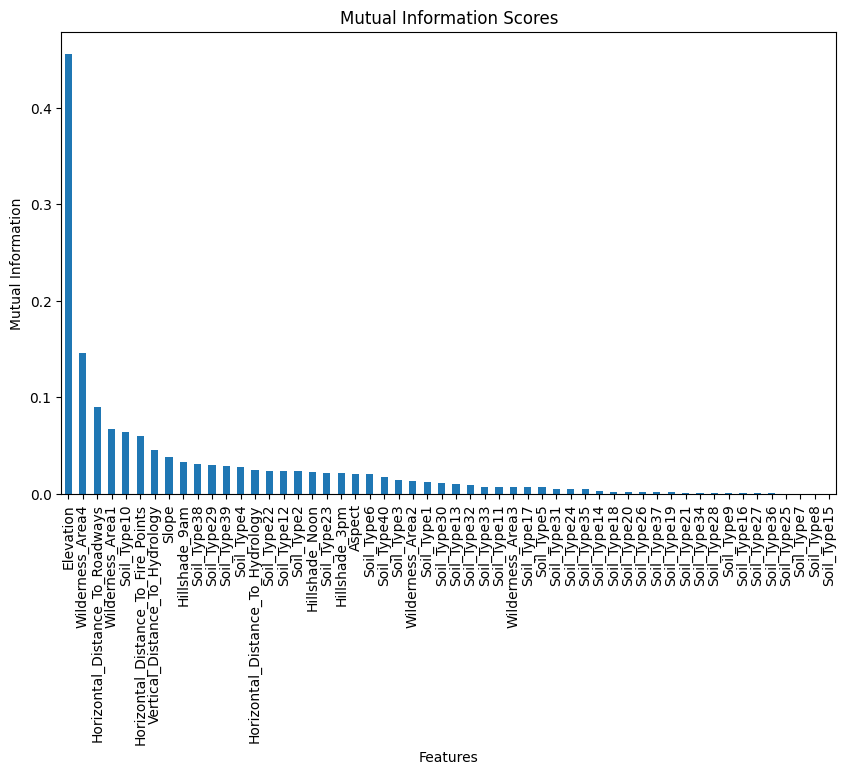

In [27]:
sorted_mi = pd.Series(mi,index = train_set.drop("class",axis=1).columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sorted_mi.plot(kind="bar")
plt.title('Mutual Information Scores')
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.show()

> #### It seems that `Elevation` has the most predictive power. I'll keep all features, as the model can handle complex relationships and may still find value in features that seem less important.

## Building and Training the model

    This section explore model building, training, and evaluating the model. I will start with a basic neural network structure and inspect how it does on a test set and a validation set.

    Worthy to note that I will be using the Sequential model API from tf.keras, and will integrate the Model Checkpoints, Early Stopping, and Tensorboad Call backs.

        Model Checkpoints:  Keeps checkpoints of the models in case a crash happens
        Early Stopping: Stops the fitting process if no increase is noticed in the a specified monitored loss
        Tensorboard: A visualization toolkit to help with inspecting the runs/experiments 

    We are also trying to predict one of 7 classes (mutually exclusive), making it a multi-class classification problem. This is very important to help with determing what the output layer would look like.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Splitting features
x_train = train_set.drop("class", axis=1)
y_train = train_set[["class"]]

ct =  ColumnTransformer([("scale",StandardScaler(),num_cols)],remainder='passthrough')

x_train_s = ct.fit_transform(x_train)
x_train_s = pd.DataFrame(x_train_s,columns = x_train.columns)

In [29]:
def split_features_scale_test_set(test_set:pd.DataFrame,column_transformer):

    x_test = test_set.drop("class",axis=1)
    y_test = test_set[["class"]]

    x_test_s = column_transformer.transform(x_test)
    x_test_s = pd.DataFrame(x_test_s,columns = x_test.columns)
    

    return x_test_s, y_test

In [30]:
x_test_s, y_test = split_features_scale_test_set(test_set,ct)

In [30]:
model_base = tf.keras.Sequential([
        tf.keras.layers.Input(shape = (x_train_s.shape[1],)),
        tf.keras.layers.Dense(128,activation="relu"),
        tf.keras.layers.Dense(64,activation="relu"),
        tf.keras.layers.Dense(32,activation="relu"),
        tf.keras.layers.Dense(7,activation = "softmax") # Softmax return the probabilty of each class
    ])

opt = tf.keras.optimizers.SGD(learning_rate = 0.01)
model_base.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"], optimizer = opt) 
model_base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           7,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,607 (68.78 KB)

 Trainable params: 17,607 (68.78 KB)

 Non-trainable params: 0 (0.00 B)

> #### The `sparse_categorical_crossentropy` checks the distribution of probabilities between the prediction and actual labels these labels (in this case were numbered (0,1,2,3)), hence why it was choosen. For one hot encoded vectors you would use the categorical_crossentropy loss to measure.

> #### `accuracy` might not be an accurate measure as the classes are imbalanced, we will utilize the classification report that includes other metrics like precision, recall, and f1-score.

In [49]:
from pathlib import Path
from time import strftime

# A function that formats how our runs are saved in the directory that tensorboard will point to
def get_run_log_directory(root_logdir = "my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H,_%M_%S")

run_logdir = get_run_log_directory()

In [55]:
model_checking = tf.keras.callbacks.ModelCheckpoint("my_checkpoints.weights.h5",save_weights_only = True)
early_Stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights = True)
tensorboard_callback = tf.keras.callbacks.TensorBoard(run_logdir,profile_batch = (200,300))

In [33]:
# keras will handle the validation set using a 20% split
history_base = model_base.fit(x_train_s,y_train,validation_split = 0.2,
                              epochs=50,batch_size=40,verbose=1,callbacks=[model_checking,early_Stopping,tensorboard_callback])

Epoch 1/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.6760 - loss: 0.8143 - val_accuracy: 0.7460 - val_loss: 0.6008
Epoch 2/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7518 - loss: 0.5858 - val_accuracy: 0.7322 - val_loss: 0.6049
Epoch 3/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7650 - loss: 0.5491 - val_accuracy: 0.7528 - val_loss: 0.5598
Epoch 4/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7746 - loss: 0.5230 - val_accuracy: 0.7703 - val_loss: 0.5241
Epoch 5/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7841 - loss: 0.4996 - val_accuracy: 0.7830 - val_loss: 0.5004
Epoch 6/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7911 - loss: 0.4835 - val_accuracy: 0.7637 - val_loss: 0.5396
Epoch 7/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7974 - loss: 0.4693 - val_accuracy: 0.7947 - val_loss: 0.4752
Epoch 8/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 

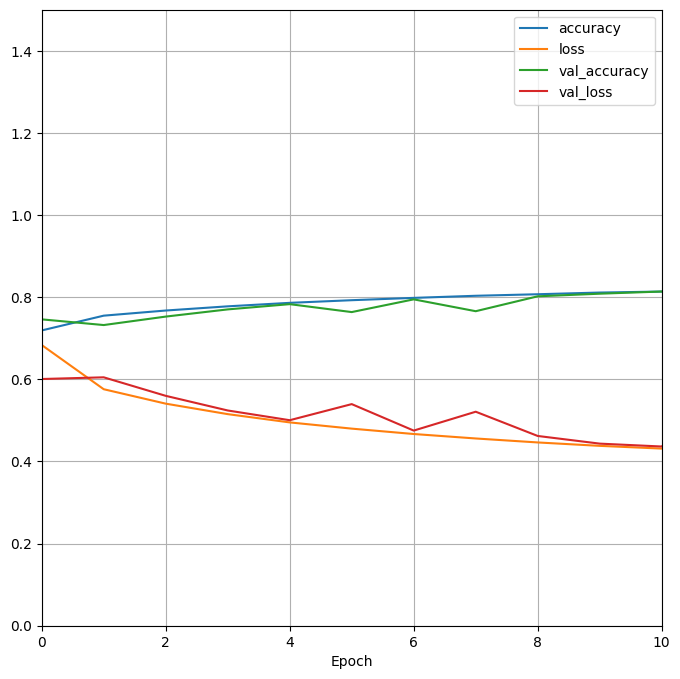

<Figure size 640x480 with 0 Axes>

In [34]:
pd.DataFrame(history_base.history).plot(
    figsize = (8,8), xlim = [0,10],ylim = [0, 1.5],grid = True, xlabel = "Epoch"
)
plt.show()
plt.clf()

#### Observations:

> #### The accuracy value is about 50%, meaning that the model get the prediction right half of the time.
> #### The validation loss which is slightly lower than the training loss, is still high. We want to minimize it as much as possible (closer to 0).

#### Overall: The validation loss is fluctuating and is slightly higher than the training loss, which indicates some overfitting. I will add a regularization method called drop out thar drops some of the outputs of layer at a given rate. However, I will start by changing the learning rate to see if the behaviour advances, then add the dropout layers, and then apply hyperparameter tuning using KerasTuner to a predefined neural network


In [35]:
model_LR = tf.keras.Sequential([
        tf.keras.layers.Input(shape = (x_train_s.shape[1],)),
        tf.keras.layers.Dense(128,activation="relu"),
        tf.keras.layers.Dense(64,activation="relu"),
        tf.keras.layers.Dense(32,activation="relu"),
        tf.keras.layers.Dense(7,activation = "softmax") # Softmax return the probabilty of each class
    ])

opt = tf.keras.optimizers.SGD(learning_rate = 0.1)
model_LR.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"], optimizer = opt) 
model_LR.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           7,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,607 (68.78 KB)

 Trainable params: 17,607 (68.78 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history_LR = model_LR.fit(x_train_s,y_train,validation_split = 0.2,
                              epochs=50,batch_size=40,verbose=1,callbacks=[model_checking,early_Stopping,tensorboard_callback])

Epoch 1/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.7266 - loss: 0.6448 - val_accuracy: 0.7755 - val_loss: 0.5130
Epoch 2/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7862 - loss: 0.4941 - val_accuracy: 0.7869 - val_loss: 0.4831
Epoch 3/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.8051 - loss: 0.4522 - val_accuracy: 0.7724 - val_loss: 0.5225
Epoch 4/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.8146 - loss: 0.4289 - val_accuracy: 0.8199 - val_loss: 0.4197
Epoch 5/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.8235 - loss: 0.4100 - val_accuracy: 0.8113 - val_loss: 0.4470
Epoch 6/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.8305 - loss: 0.3953 - val_accuracy: 0.8212 - val_loss: 0.4162
Epoch 7/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.8357 - loss: 0.3846 - val_accuracy: 0.8215 - val_loss: 0.4121
Epoch 8/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 

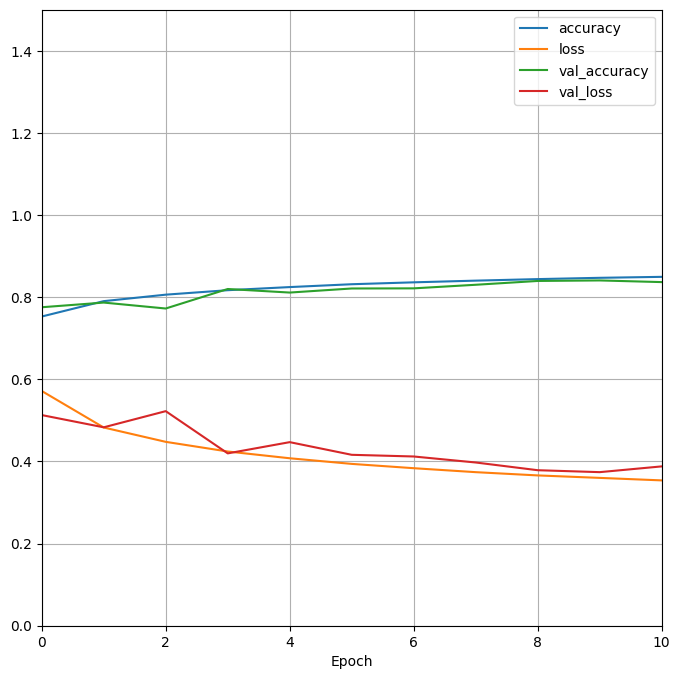

<Figure size 640x480 with 0 Axes>

In [37]:
pd.DataFrame(history_LR.history).plot(
    figsize = (8,8), xlim = [0,10],ylim = [0, 1.5],grid = True, xlabel = "Epoch"
)
plt.show()
plt.clf()

> #### Notice that the accuracy has reached 0.87, and the validation loss has dropped to around 0.3540. However it still higher than the training loss which implies overfitting is still in effect. 

In [38]:
model_reg = tf.keras.Sequential([
        tf.keras.layers.Input(shape = (x_train_s.shape[1],)),
        tf.keras.layers.Dense(128,activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(64,activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(32,activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(7,activation = "softmax") # Softmax return the probabilty of each class
    ])

opt = tf.keras.optimizers.SGD(learning_rate = 0.1)
model_reg.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"], optimizer = opt) 
model_reg.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           7,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,607 (68.78 KB)

 Trainable params: 17,607 (68.78 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history_reg = model_reg.fit(x_train_s,y_train,validation_split = 0.2,
                              epochs=50,batch_size=40,verbose=1,callbacks=[model_checking,early_Stopping,tensorboard_callback])

Epoch 1/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.7160 - loss: 0.6866 - val_accuracy: 0.7506 - val_loss: 0.5578
Epoch 2/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7587 - loss: 0.5560 - val_accuracy: 0.7824 - val_loss: 0.4928
Epoch 3/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7722 - loss: 0.5242 - val_accuracy: 0.7920 - val_loss: 0.4786
Epoch 4/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7800 - loss: 0.5034 - val_accuracy: 0.8014 - val_loss: 0.4551
Epoch 5/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7857 - loss: 0.4910 - val_accuracy: 0.8078 - val_loss: 0.4423
Epoch 6/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7921 - loss: 0.4794 - val_accuracy: 0.8030 - val_loss: 0.4493
Epoch 7/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7935 - loss: 0.4722 - val_accuracy: 0.8158 - val_loss: 0.4244
Epoch 8/50
10459/10459 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 

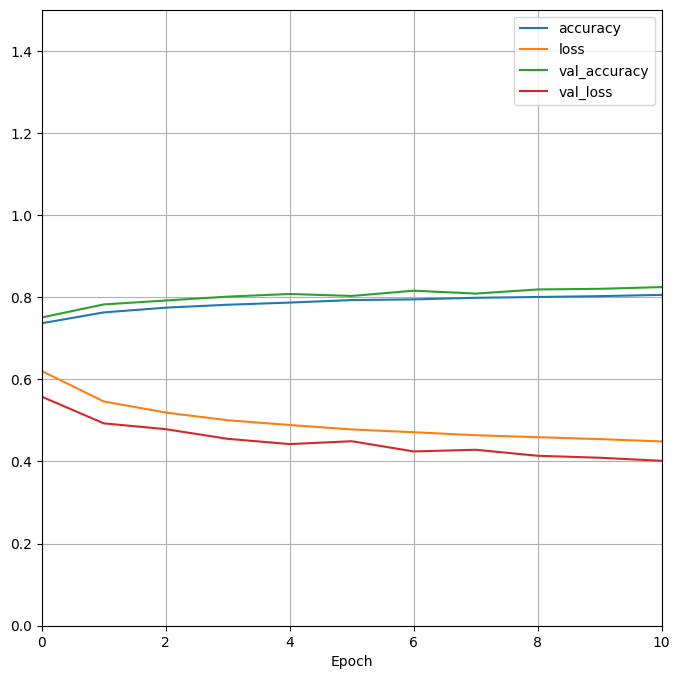

<Figure size 640x480 with 0 Axes>

In [41]:
pd.DataFrame(history_reg.history).plot(
    figsize = (8,8), xlim = [0,10],ylim = [0, 1.5],grid = True, xlabel = "Epoch"
)
plt.show()
plt.clf()

> #### The validation loss after applying regularization has decreased and is lower than the training loss, which showcases its effectiveness in combating overfitting (in comparison to the original model).

> #### However the accuracy is somewhat lower than before we introduced the drop out layers, and the validation loss is slightly higher.

## Hyperparameter tuning with keras_tuner

In [33]:
import keras_tuner as kt

In [43]:
# We will have to define a function that builds, compiles, and returns a keras model. It will take a kt.HyperParameters object used to define them alongside their range.
def build_model(hp):
    n_hidden = hp.Int("n_hidden",min_value = 0,max_value=8,default=2)
    n_neurons = hp.Int("n_neurons",min_value = 16,max_value=128)
    learning_rate = hp.Float("learning_rate",min_value = 1e-4,max_value=1e-2,sampling="log")
    rate = hp.Float("rate", min_value = 0, max_value=1)
    optimizer = hp.Choice("optimizer", values=['sgd','adam'])
    
    if optimizer == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape = (x_train_s.shape[1],)))
    for i in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation = "relu"))
        model.add(tf.keras.layers.Dropout(rate))
    model.add(tf.keras.layers.Dense(7,activation = "softmax"))
    model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"], optimizer = optimizer)
    return model

In [55]:
random_search_tuner = kt.RandomSearch(build_model,objective="val_loss",max_trials=5,overwrite=True,directory="cover_type_tuning_random",project_name = "random_search",seed=42)

In [56]:
random_search_tuner.search(x_train_s,y_train,epochs=10,validation_split = 0.20)

Trial 5 Complete [00h 06m 27s]
val_loss: 0.8911292552947998

Best val_loss So Far: 0.6220874190330505
Total elapsed time: 00h 28m 02s


In [59]:
top3 = random_search_tuner.get_best_models(num_models=3)
Best_model = top3[0]

In [60]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 5,
 'n_neurons': 20,
 'learning_rate': 0.0006562536901904111,
 'rate': 0.2718754143840908,
 'optimizer': 'adam'}

In [61]:
Best_model.fit(x_train,y_train,epochs=10) 

Epoch 1/10
16341/16341 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.4305 - loss: 3656.2563
Epoch 2/10
16341/16341 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.4873 - loss: 1.2922
Epoch 3/10
16341/16341 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.4881 - loss: 1.1944
Epoch 4/10
16341/16341 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.4867 - loss: 1.1978
Epoch 5/10
16341/16341 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.4888 - loss: 1.1909
Epoch 6/10
16341/16341 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.4870 - loss: 1.1845
Epoch 7/10
16341/16341 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.4876 - loss: 1.1871
Epoch 8/10
16341/16341 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.4882 - loss: 1.1859
Epoch 9/10
16341/16341 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.4878 - loss: 1.1888
Epoch 10/10
16341/16341 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.4872 - loss: 1.1923


In [62]:
loss, accuracy = Best_model.evaluate(x_test_s,y_test)
print(f"\n \n sparse cross entropy loss: {loss}, accuracy = {accuracy}")

1816/1816 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4881 - loss: 1.1775

 
 sparse cross entropy loss: 1.1782547235488892, accuracy = 0.4876079857349396


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
y_pred = Best_model.predict(x_test_s)
y_pred = np.argmax(y_pred, axis=1)

# Classification report
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

1816/1816 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     21184
           1       0.49      1.00      0.66     28331
           2       0.00      0.00      0.00      3575
           3       0.00      0.00      0.00       275
           4       0.00      0.00      0.00       949
           5       0.00      0.00      0.00      1737
           6       0.00      0.00      0.00      2051

    accuracy                           0.49     58102
   macro avg       0.07      0.14      0.09     58102
weighted avg       0.24      0.49      0.32     58102

   0      1  2  3  4  5  6
0  0  21184  0  0  0  0  0
1  0  28331  0  0  0  0  0
2  0   3575  0  0  0  0  0
3  0    275  0  0  0  0  0
4  0    949  0  0  0  0  0
5  0   1737  0  0  0  0  0
6  0   2051  0  0  0  0  0


In [68]:
y_pred = model_reg.predict(x_test_s)
y_pred = np.argmax(y_pred, axis=1)

# Classification report
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

1816/1816 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.79      0.83     21184
           1       0.84      0.91      0.87     28331
           2       0.77      0.88      0.82      3575
           3       0.81      0.64      0.71       275
           4       0.81      0.42      0.55       949
           5       0.71      0.54      0.61      1737
           6       0.92      0.77      0.84      2051

    accuracy                           0.84     58102
   macro avg       0.82      0.71      0.75     58102
weighted avg       0.84      0.84      0.84     58102

       0      1     2    3    4    5     6
0  16808   4231     1    0    5   17   122
1   1951  25908   212    0   87  160    13
2      1    183  3161   27    3  200     0
3      0      0    86  175    0   14     0
4     31    482    38    0  397    1     0
5      3    169   613   13    0  939     0
6    443     28     0    0    0    0  1580


> #### Our hyperparamter tuned model seems to do much worse than our previous regularized model as it only predicts the first class. The regularized model has:

A Balanced Performance:

    Accuracy: 84%
    Weighted and macro averages of precision, recall, and F1-scores are reasonable considering class imbalance.
    Most classes, including minority ones, were well-represented in predictions.
Some Class-Specific Issues:

    Class 4 and 5 had lower precision and recall (e.g., Class 4: recall = 42%, precision = 81%).
    These classes likely had overlap in features or were harder to distinguish.
    Confusion matrix confirms misclassification patterns—Class 4 is often confused with Class 1 and Class 2.
A Better Generalization:

The validation loss (0.3) indicates that the model was not overfitting.

### We could try to make a similar netwrok and attempt the tuning process again

In [34]:
def build_model_n(hp):
    n_hidden = hp.Int("n_hidden", min_value=2, max_value=6, default=3)
    n_neurons = hp.Int("n_neurons", min_value=64, max_value=128, step=16)
    dropout_rate = hp.Float("rate", min_value=0.1, max_value=0.3, step=0.1)
    learning_rate = hp.Float("learning_rate", min_value=0.01, max_value=0.1)  
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(x_train_s.shape[1],)))
    for i in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(7, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"],
                  optimizer=optimizer)
    return model


In [35]:
random_search_tuner_n = kt.RandomSearch(build_model_n,objective="val_loss",max_trials=5,overwrite=True,directory="cover_type_tuning_random_n",project_name = "random_search_n",seed=42)

In [36]:
random_search_tuner_n.search(x_train_s,y_train,epochs=10,validation_split = 0.20)

Trial 5 Complete [00h 03m 42s]
val_loss: 0.4086467921733856

Best val_loss So Far: 0.4086467921733856
Total elapsed time: 00h 18m 52s


In [38]:
top3 = random_search_tuner_n.get_best_models(num_models=3)
Best_model_n = top3[0]

In [39]:
top3_params = random_search_tuner_n.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 3,
 'n_neurons': 80,
 'rate': 0.1,
 'learning_rate': 0.05450386923814913}

In [42]:
y_pred = Best_model_n.predict(x_test_s)
y_pred = np.argmax(y_pred, axis=1)

# Classification report
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

1816/1816 ━━━━━━━━━━━━━━━━━━━━ 2s 830us/step
              precision    recall  f1-score   support

           0       0.85      0.78      0.81     21184
           1       0.82      0.89      0.86     28331
           2       0.74      0.88      0.80      3575
           3       0.61      0.46      0.52       275
           4       0.60      0.46      0.52       949
           5       0.68      0.44      0.53      1737
           6       0.87      0.76      0.81      2051

    accuracy                           0.82     58102
   macro avg       0.74      0.67      0.69     58102
weighted avg       0.82      0.82      0.82     58102

       0      1     2    3    4    5     6
0  16439   4482     2    0   34   17   210
1   2394  25267   233    0  253  165    19
2      0    207  3146   55    6  161     0
3      0      0   142  127    0    6     0
4     47    414    47    0  433    8     0
5      3    255   689   27    0  763     0
6    466     22     0    0    0    0  1563


> ### This model exhibited a higher validation loss compared to our regularized model and performed slightly worse overall. Attempting to build the model with a similar structure and base parameters (e.g., the learning rate that performed better), increasing the number of epochs during each trial, and tuning the batch size could lead to further improvements.

### Returing to the `model_LR` that suffered from overfitting, could hyperparameter tuning help?

In [51]:
def build_model_LR(hp):
    n_hidden = hp.Int("n_hidden", min_value=2, max_value=4, default=3)
    n_neurons = hp.Int("n_neurons", min_value=64, max_value=128, step=16)
    learning_rate = hp.Float("learning_rate", min_value=0.05, max_value=0.1)  
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(x_train_s.shape[1],)))
    for i in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(7, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"],
                  optimizer=optimizer)
    return model

In [52]:
random_search_tuner_LR = kt.RandomSearch(build_model_LR,objective="val_loss",max_trials=5,overwrite=True,directory="cover_type_tuning_random_lr",project_name = "random_search_lr",seed=42)

In [56]:
random_search_tuner_LR.search(x_train_s,y_train,epochs=40,validation_split = 0.20, callbacks = [early_Stopping]) # Increased the epochs but added the early stopping call back to monitor the loss

Trial 5 Complete [00h 11m 41s]
val_loss: 0.32551848888397217

Best val_loss So Far: 0.3136538565158844
Total elapsed time: 00h 52m 31s


In [59]:
top3 = random_search_tuner_LR.get_best_models(num_models=3)
Best_model_lr = top3[0]

In [60]:
top3_params = random_search_tuner_LR.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 2, 'n_neurons': 128, 'learning_rate': 0.06759231279139413}

In [61]:
y_pred = Best_model_lr.predict(x_test_s)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred, zero_division=0))

print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

1816/1816 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step
              precision    recall  f1-score   support

           0       0.88      0.85      0.86     21184
           1       0.87      0.92      0.89     28331
           2       0.87      0.84      0.86      3575
           3       0.88      0.64      0.74       275
           4       0.85      0.52      0.65       949
           5       0.73      0.74      0.73      1737
           6       0.91      0.86      0.88      2051

    accuracy                           0.87     58102
   macro avg       0.86      0.77      0.80     58102
weighted avg       0.87      0.87      0.87     58102

       0      1     2    3    4     5     6
0  17923   3089     1    0    6     7   158
1   2126  25938    65    0   80   103    19
2      4    228  3002   16    1   324     0
3      0      2    67  176    0    30     0
4     41    386    26    0  494     2     0
5     11    164   276    8    1  1277     0
6    276     14     0    0    0     0  1761


> ### The model achieved an accuracy of 87% on the test set. Precision, which measures how many predicted positives are actually correct, is strong across most classes. However, class 4 (Aspen Cover) shows a lower recall of 0.52, meaning the model struggles to identify this class, often missing actual positives.

## It's worth noting that hyperparameter tuning can be time-consuming. Demonstrating results with simpler, smaller models is often preferred, especially during the initial stages of experimentation or when quick insights are needed.

-------------
### Extra: You could add the tensorboard callback into any of the fitting processes (or the search process) in order to save it in the logs then inspect all runs.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./log